In [1]:
# se realizan las importaciones necesarios
import numpy as np
from numpy.random import normal
from numpy.random import uniform
from numpy.random import triangular
import matplotlib.pyplot as plt
from scipy import stats
print("Todas las librerías han sido importadas.")

Todas las librerías han sido importadas.


In [2]:
N=10**6

# Magnitudes Correlacionadas

Suponga que se tiene el siguiente conjunto de datos correspondientes a mediciones simultáneas de temperatura y presión atmosférica de un recinto donde se almacenan pesas.

|Número de medición|Temperatura (°C)|Presión atmosférica (hPa)|
|---|---|---|
|$1$|$18.16$|$860.22$|
|$2$|$23.35$|$971.13$|
|$3$|$22.04$|$956.47$|
|$4$|$20.14$|$903.95$|
|$5$|$24.68$|$1015.16$|
|$6$|$18.29$|$859.89$|
|$7$|$19.69$|$904.76$|
|$8$|$20.64$|$916.72$|
|$9$|$20.27$|$919.63$|
|$10$|$26.74$|$1086.31$|
|$11$|$23.61$|$993.34$|
|$12$|$21.49$|$941.61$|
|$13$|$20.55$|$910.83$|
|$14$|$18.87$|$882.48$|
|$15$|$22.90$|$982.60$|

La incertidumbre por calibración para el termómetro es de $0.09\textrm{ °C}$ ($k = 2$; distribución normal; $95.45\%$) y la incertidumbre por calibración para el barómetro es $0.10\textrm{ hPa}$ ($k = 2$; distribución normal; $95.45\%$). La deriva instrumental entre calibraciones sucesivas del termómetro se estima en $\pm0.05\textrm{ °C}$ y la del barómetro corresponde a $\pm0.07\textrm{ hPa}$.

Se desea conocer la densidad del aire del recinto, para ello se empleará la ecuación de Boyle-Marriote que establece que:

$$\rho=0.99462\cdot\frac{1.20139\textrm{ kg/m}^3\cdot 293.15\textrm{ K}\cdot p}{1015\textrm{ hPa}\cdot\left(273.15+t\right)}$$

Donde:
- $\rho$ es la densidad del aire, en $\textrm{kg/m}^3$.
- $p$ es la presión atmosférica, en $\textrm{hPa}$.
- $t$ es la temperatura, en $\textrm{°C}$.

La ecuación de Boyle-Marriote tiene un error de $\pm0.9\%$ del valor de densidad del aire.

In [3]:
t=np.array([18.16,23.35,22.04,20.14,24.68,18.29,19.69,20.64,20.27,26.74,23.61,21.49,20.55,18.87,22.9])
p=np.array([860.22,971.13,956.47,903.95,1015.16,859.89,904.76,916.72,919.63,1086.31,993.34,941.61,910.83,882.48,982.60])

In [4]:
t=t.mean()+normal(0,t.std()/np.sqrt(len(t)),size=N)+normal(0,0.09/2,size=N)+uniform(-0.05,0.05,size=N)
p=p.mean()+normal(0,p.std()/np.sqrt(len(p)),size=N)+normal(0,0.10/2,size=N)+uniform(-0.07,0.07,size=N)

In [5]:
def Densidad(t,p):
    return 0.99462*1.20139*293.15*p/(273.15+t)/1015

In [6]:
densidad=Densidad(t,p)+uniform(-0.9*Densidad(t,p).mean()/100,0.9*Densidad(t,p).mean()/100,size=N)

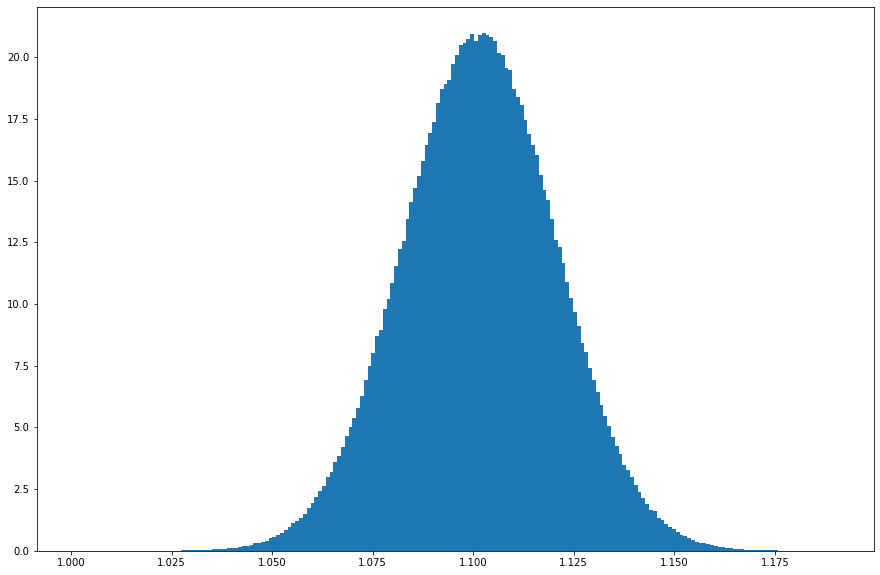

In [7]:
plt.figure(figsize=(15,10))
plt.hist(densidad,bins=200,density=True)
plt.show()

In [8]:
densidad.mean(),densidad.std()

(1.1016722894425859, 0.01905156919144664)

In [9]:
dist=getattr(stats,'norm')
dist.fit(densidad)

(1.1016722894425859, 0.01905156919144664)

In [10]:
stats.kstest(densidad, "norm", dist.fit(densidad))

KstestResult(statistic=0.000544700231988382, pvalue=0.9278785034437095)

Ahora, se tomarán en cuenta las correlaciones, para esto se calcula la matriz de covarianza

In [11]:
X=np.hstack((t.reshape((len(t),1)),p.reshape((len(p),1)))).T
cov=np.cov(X)

In [12]:
from numpy.random import multivariate_normal

In [13]:
t=np.array([18.16,23.35,22.04,20.14,24.68,18.29,19.69,20.64,20.27,26.74,23.61,21.49,20.55,18.87,22.9])
p=np.array([860.22,971.13,956.47,903.95,1015.16,859.89,904.76,916.72,919.63,1086.31,993.34,941.61,910.83,882.48,982.60])

In [14]:
muestreo=multivariate_normal(np.array([t.mean(),p.mean()]),cov,size=N)

In [15]:
t=muestreo[:,0]+normal(0,t.std()/np.sqrt(len(t)),size=N)+normal(0,0.09/2,size=N)+uniform(-0.05,0.05,size=N)
p=muestreo[:,1]+normal(0,p.std()/np.sqrt(len(p)),size=N)+normal(0,0.10/2,size=N)+uniform(-0.07,0.07,size=N)

In [16]:
densidad=Densidad(t,p)+uniform(-0.09*Densidad(t,p)/100,0.09*Densidad(t,p)/100,size=N)

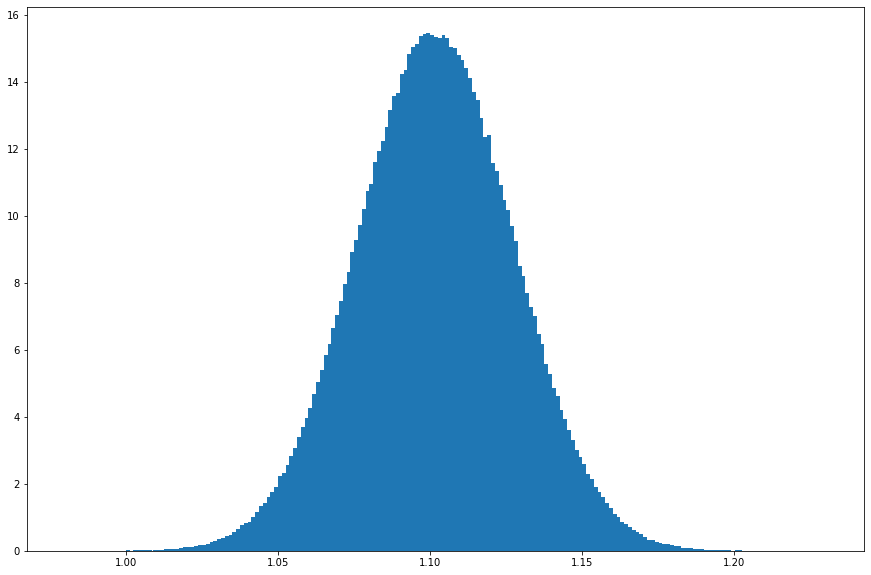

In [17]:
plt.figure(figsize=(15,10))
plt.hist(densidad,bins=200,density=True)
plt.show()

In [18]:
densidad.mean(),densidad.std()

(1.101680756556355, 0.02571636991656139)

In [19]:
dist=getattr(stats,'norm')
dist.fit(densidad)

(1.101680756556355, 0.02571636991656139)

In [20]:
stats.kstest(densidad, "norm", dist.fit(densidad))

KstestResult(statistic=0.0009666593886851205, pvalue=0.30726924687729884)

Ahora, se cambia el enfoque del cálculo de la repetibilidad

In [21]:
t=np.array([18.16,23.35,22.04,20.14,24.68,18.29,19.69,20.64,20.27,26.74,23.61,21.49,20.55,18.87,22.9])
p=np.array([860.22,971.13,956.47,903.95,1015.16,859.89,904.76,916.72,919.63,1086.31,993.34,941.61,910.83,882.48,982.60])

In [22]:
t=t.reshape((len(t),1))+normal(0,0.09/2,size=(len(t),N))+uniform(-0.05,0.05,size=(len(t),N))
p=p.reshape((len(p),1))+normal(0,0.10/2,size=(len(p),N))+uniform(-0.07,0.07,size=(len(p),N))

In [23]:
densidad=Densidad(t,p)+uniform(-0.09*Densidad(t,p)/100,0.09*Densidad(t,p)/100,size=(len(p),N))

In [24]:
densidad=np.mean(densidad,axis=0)+normal(0,np.std(densidad,axis=0)/np.sqrt(len(t)),size=N)

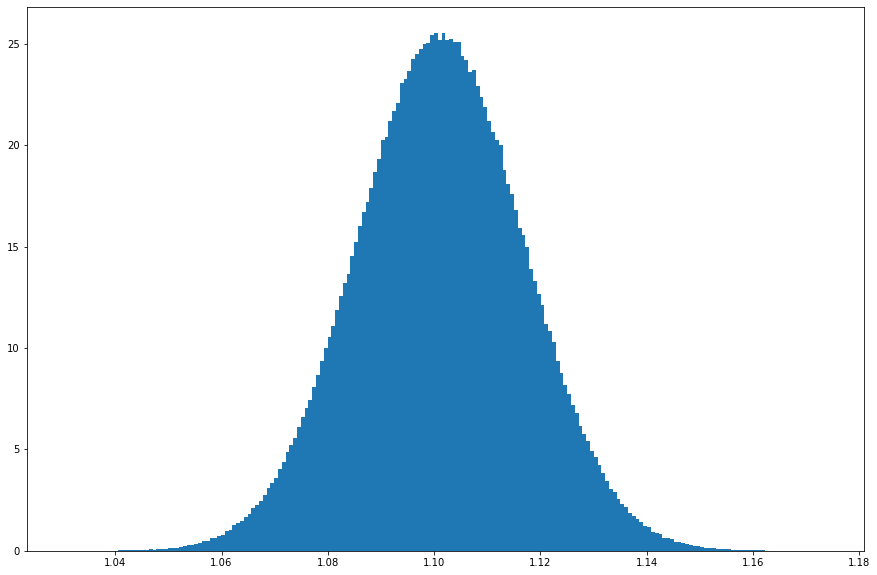

In [25]:
plt.figure(figsize=(15,10))
plt.hist(densidad,bins=200,density=True)
plt.show()

In [26]:
densidad.mean(),densidad.std()

(1.1011703852063082, 0.015702439678162507)

In [27]:
dist=getattr(stats,'norm')
dist.fit(densidad)

(1.1011703852063082, 0.015702439678162507)

In [28]:
stats.kstest(densidad, "norm", dist.fit(densidad))

KstestResult(statistic=0.00042132977779074654, pvalue=0.9942658613501546)